# Линейная регрессия

Линейная регрессия - самый простой инструмент выявления зависимости между различными числовыми признакми. Часто линейную регрессию относят к методам машинного обучения, однако на самом деле - это не так. Восстановить линейную ргрессию - то есть линейную зависимость между различными числовыми данными - можно с помощью аналитического решения. Тем не менее, так как линейная ргрессия решает ту же задачу, что и машинное обучение - задачу восстановления зависимости между данными - для регрессии применяются те же термины и понятия, что и для машинного обучения.

## Теоретические основания

### Базовые понятия, используемые в машинном обучении

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых планируется строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x_{i}, y_{i})^l_{i=1}.$$

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, позволяющая делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

Отметим, что $ x_{i} = (x^{1}, x^{2}, ..., x^{d}) $. То есть каждый объект $x_{i}$ состоит из ряда различных значений.

### Линейная регрессия

#### Линейная модель

Для начала введём проствую базовую линейную модель, записанную следующим образом:

$$a(x) = w_{0} + w_{1}x^{1} + ... + w_{d}x^{d} = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$

Параметрами модели $a(x)$ являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_, _сдвигом_ или _смещением_. Оптимизация модели заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:

$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$

Чтобы сделать модель однородной и упростить оптимизацию вводится фиктивный признак $x^{0}$ всегда равный единице. Таким образом:

$$a(x) = \left \langle w,x \right \rangle = \sum^{d}_{i=0}w_{i}x^{i} $$

#### Функционал ошибки

Для обучения модели и сравнения различных моделей между собой необходимо разработать математическую формулу и алгоритм расчёта ошибки модели. В рамках решения задачи оптимизации обычно ставится задача достижения минимального значения функционала ошибки.

В качестве очевидного решения можно предложить такую формулу:
$Q(a,y)=a(x)-y$. Однако, у неё есть принципиальная проблема: у такой функции не существует минимума.

С учётом этого, логичным кажется решение использовать в качестве функции для расчёта ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, мы уже разбирали, что функционал ошибки или функция потерь, должны быть дифференцируемы, а значит, необходимо предложить другой вариант базовой функции для расчёта ошибки: $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

#### Вывод аналитической формулы для решения линейной регрессии

Таким образом, задача расчёт оптимальных коэффициентов математически может быть записана следующим образом.

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Если вас смущает возникшая, казалось бы путаница, между различными записями, то целесообразно ввести матричную запись признаков:

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\
... & ... & ...\\
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

$$y = \begin{pmatrix}
y_{1}\\
...\\
y_{l}
\end{pmatrix}.$$

Таким образом, задача начинает выглядеть следующим образом

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

Взяв производную (от матрицы (!)) и прировняв её к нулю (точка экструма квадратинчной функции) можно получить значения коэффициентов:

$$w = (X^{T}X)^{-1}X^{T}y.$$

Если вам интересна более детальная математическая подоплёка смотрите её тут: [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)

## Практика

Построим простую модель линейной регрессии.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression # именно в библиотеке sklearn содержится наиболее оптмаильный метод для вычисления линейной регрессии

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [3]:
y

array([ 5, 20, 14, 32, 22, 38])

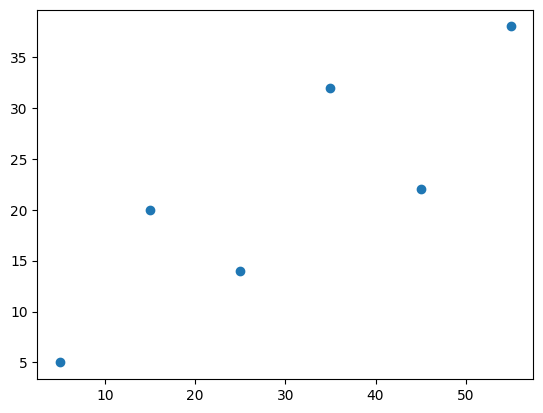

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()

In [ ]:
# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression

model = LinearRegression()

In [6]:
# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д,
# используя существующие вход и выход (x и y) в качестве аргументов.

model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
w0 = model.intercept_
w0

np.float64(5.633333333333329)

In [8]:
w1 = model.coef_
w1

array([0.54])

$$ y = w_{0} + w_{1}x $$
$$ y = 5.63 + 0.54*x $$

Проверим результаты прямыми вычислениями

In [9]:
np.linalg.inv(x.T@x)@x.T@y

array([0.68181818])

In [10]:
x1 = np.array([[1, 5], [1, 15], [1, 25], [1, 35], [1, 45], [1, 55]])
x1

array([[ 1,  5],
       [ 1, 15],
       [ 1, 25],
       [ 1, 35],
       [ 1, 45],
       [ 1, 55]])

In [11]:
np.linalg.inv(x1.T@x1)@x1.T@y

array([5.63333333, 0.54      ])

Визуализируем результат

In [12]:
# предсказание результатов
y_pred = model.predict(x)
# y = np.array([5, 20, 14, 32, 22, 38])
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

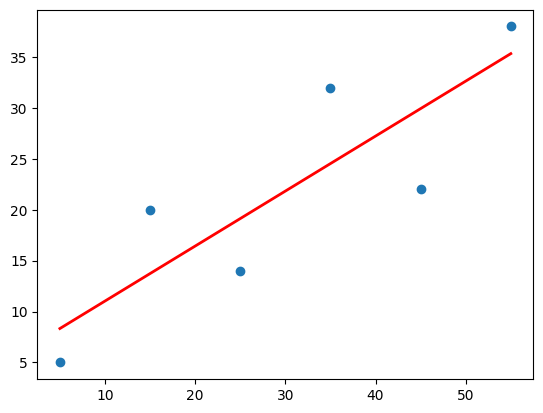

In [13]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

### Пример того, почему регрессия "Линейная"

In [14]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
y = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16])

In [15]:
model1 = LinearRegression()

In [16]:
model1.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model1.predict(x)

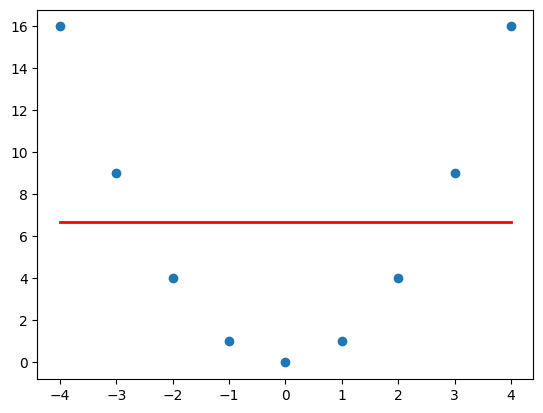

In [18]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()